# Analysis 🌧️ 🫘 🌳

## 📋  Table of Contents
- [1. Data Dictionary](#data-dictionary)
- [2. Dataset Overview](#dataset-overview)
- [3. Bivariate Analysis](#bivariate-analysis)
- [4. Reflections](#reflections)

## 1. 📚 Data Dictionary 📖 (Merged Weather + Coffee Dataset) 


This dataset combines weather data (Jan–May) and coffee harvest data (June–Sept) for **Minas Gerais, Brazil**.

| 🌦️ Weather Variables (Jan–May)         | Description                                                | ☕ Coffee Variables (June–Sept)                  | Description                                                    |
|----------------------------------------|------------------------------------------------------------|--------------------------------------------------|----------------------------------------------------------------|
| `year`                                 | Year of observation                                        | `country`                                       | Country of harvest (all should be Brazil)                     |
| `rain_max`                             | Max rainfall (mm)                                          | `subdivision`                                   | Name of sub-division (Minas Gerais only)                      |
| `temp_avg`                             | Average temperature (°C)                                   | `type`                                          | Type of coffee bean (e.g., Arabica)                          |
| `temp_max`                             | Maximum temperature (°C)                                   | `60kgs_bag`                                     | Coffee harvested in 60kg bags (millions)                     |
| `temp_min`                             | Minimum temperature (°C)                                   | `nonbearing_trees`                              | Nonbearing coffee trees (millions)                           |
| `hum_max`                              | Maximum humidity (%)                                       | `bearing_trees`                                 | Bearing coffee trees (millions)                              |
| `hum_min`                              | Minimum humidity (%)                                       | `nonbear_hectares`                              | Hectares of nonbearing coffee trees (thousands)              |
| `wind_max`                             | Maximum wind speed (m/s)                                   | `bearing_hectares_per_hectare`                  | Avg. bearing trees per hectare                               |
| `wind_avg`                             | Average wind speed (m/s)                                   | `nonbearing_trees_per_hectare`                  | Avg. nonbearing trees per hectare                            |
| `subdivision`                          | Region name (Minas Gerais only)                            |                                                  |                                                                |


## 2. 📁 + 📊 + 📈 = Dataset Overview

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Exploratory Libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as locator # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python

In [24]:
# TODO: import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")
# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [25]:
# TODO: Merge these two dataframes together on the common keys, year and subdivision 
coffee_weather = weather.merge(coffee, how='inner', on=['year', 'subdivision'])
#coffee_weather = weather.merge(coffee, how='inner', left_on='year', right_on='year')

In [26]:
# TODO: View the first 5 rows of your data
coffee_weather.head(20)

,Unnamed: 0,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0
5,5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais,Brazil,Arabica,28.50,815.0,5820.0,234.0,2175.0,2676.0,3483.0
6,6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais,Brazil,Arabica,23.50,835.0,5760.0,260.0,2150.0,2679.0,3212.0
7,7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais,Brazil,Arabica,28.50,1000.0,5860.0,282.0,2105.0,2784.0,3546.0
8,8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais,Brazil,Arabica,29.40,1055.0,5810.0,307.0,2135.0,2721.0,3436.0
9,0,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais,Brazil,Arabica,26.00,1185.0,5770.0,347.0,2090.0,2761.0,3415.0


In [27]:
# TODO: Check for null values 
coffee_weather.isnull().sum()

Unnamed: 0                      0
year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision                     0
country                         0
type                            0
60kgs_bag                       0
nonbearing_trees                1
bearing_trees                   1
nonbear_hectares                1
bearing_hectares                1
bearing_trees_per_hectare       1
nonbearing_trees_per_hectare    1
dtype: int64

In [28]:
# TODO: Drop rows that contain null values
coffee_weather.dropna(inplace = True)
coffee_weather

,Unnamed: 0,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0
5,5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais,Brazil,Arabica,28.50,815.0,5820.0,234.0,2175.0,2676.0,3483.0
6,6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais,Brazil,Arabica,23.50,835.0,5760.0,260.0,2150.0,2679.0,3212.0
7,7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais,Brazil,Arabica,28.50,1000.0,5860.0,282.0,2105.0,2784.0,3546.0
8,8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais,Brazil,Arabica,29.40,1055.0,5810.0,307.0,2135.0,2721.0,3436.0
9,0,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais,Brazil,Arabica,26.00,1185.0,5770.0,347.0,2090.0,2761.0,3415.0


In [29]:
coffee_weather['Unnamed: 0'].head()  # or whatever the column name is

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [30]:
coffee_weather = coffee_weather.loc[:, ~coffee_weather.columns.str.contains('^Unnamed')]

In [31]:
coffee_weather

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0
5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais,Brazil,Arabica,28.50,815.0,5820.0,234.0,2175.0,2676.0,3483.0
6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais,Brazil,Arabica,23.50,835.0,5760.0,260.0,2150.0,2679.0,3212.0
7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais,Brazil,Arabica,28.50,1000.0,5860.0,282.0,2105.0,2784.0,3546.0
8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais,Brazil,Arabica,29.40,1055.0,5810.0,307.0,2135.0,2721.0,3436.0
9,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais,Brazil,Arabica,26.00,1185.0,5770.0,347.0,2090.0,2761.0,3415.0


In [32]:
coffee_weather.shape

(17, 19)

In [33]:
coffee_weather.isnull().sum()

year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision                     0
country                         0
type                            0
60kgs_bag                       0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

In [34]:
coffee_weather.describe()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2014.294118,3.152000,21.283485,28.171186,16.475243,96.397840,48.615141,8.484942,1.308954,26.429412,1006.705882,5789.411765,299.352941,2125.117647,2730.235294,3373.117647
std,5.428682,1.223142,0.566301,0.569878,0.915580,2.373703,3.079306,0.626471,0.399985,5.191461,294.833590,190.549226,91.957151,87.297539,172.416838,153.706653
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202,16.300000,563.000000,5330.000000,175.000000,2010.000000,2319.000000,3030.000000
25%,2010.000000,2.255738,20.959536,27.769231,16.003279,96.060440,47.475410,7.898352,0.929144,23.700000,815.000000,5725.000000,234.000000,2060.000000,2662.000000,3281.000000
50%,2014.000000,2.876923,21.088660,28.406011,16.321311,97.049451,48.493750,8.549451,1.238874,26.000000,1050.000000,5760.000000,307.000000,2105.000000,2761.000000,3421.000000
75%,2019.000000,3.769231,21.444293,28.580769,16.475275,97.450549,49.329670,8.974176,1.557709,29.100000,1185.000000,5820.000000,347.000000,2175.000000,2792.000000,3483.000000
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207,34.800000,1510.000000,6200.000000,475.000000,2298.000000,3020.000000,3578.000000


In [35]:
coffee_weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0


## <p align="center"> ☕️ How do weather patterns correlate with coffee harvest output in Minas Gerais (2006–2023)? </p>
<p align="center"> The analysis of the coffee_weather dataset reveals that weather patterns do indeed correlate with coffee harvest output, though the strength and direction of these correlations vary across different weather variables.</p>

## 4. 📊 Bivariate Analysis 


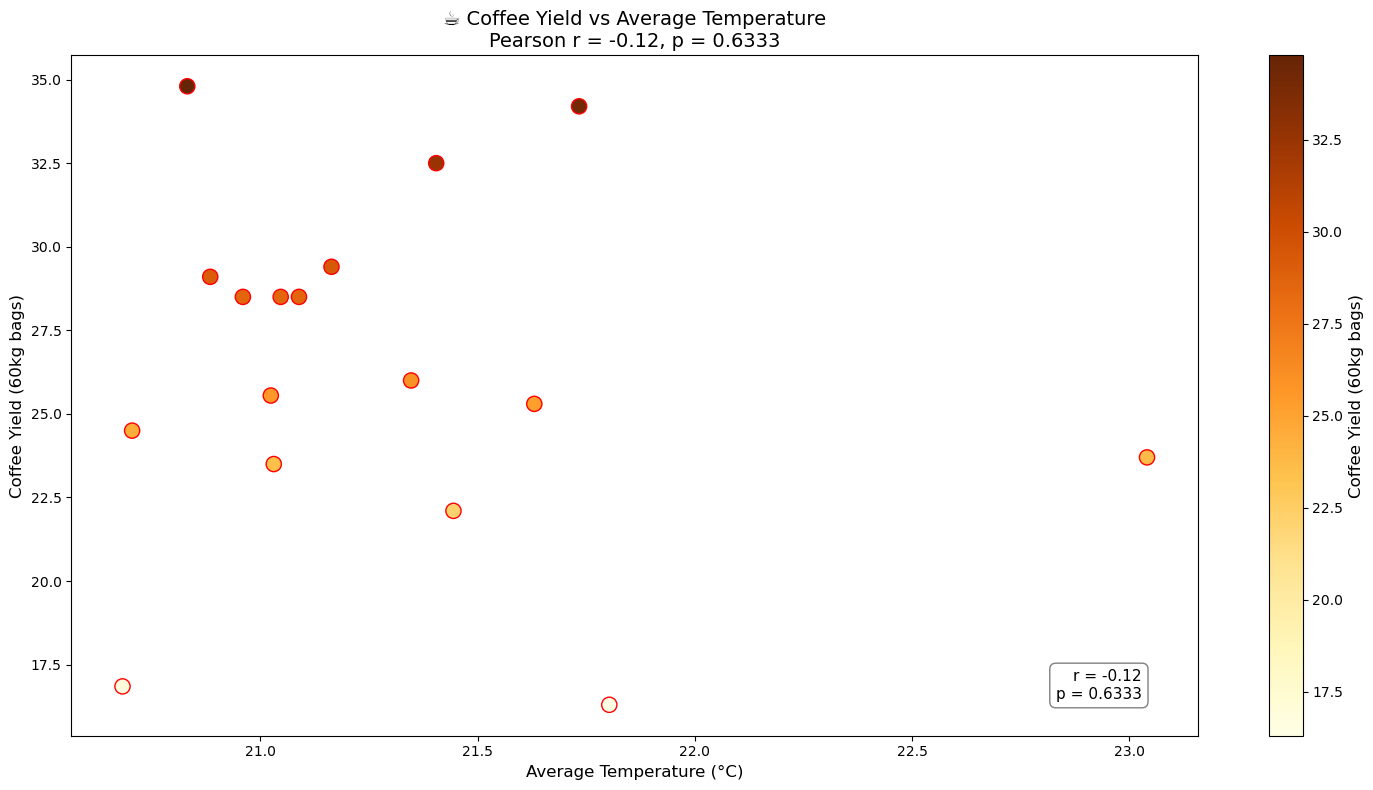

In [47]:
# TODO: BEGIN YOUR EDA! 
# Q1. What is the relationship between temp_avg and 60kgs_bag? How strong is this relationship? Use pearson's correlation coefficient.

# Scatter plot showing the relationship between temp_avg and 60kgs_bag
fig, ax = plt.subplots(figsize=(15, 8))

scatter = ax.scatter(
    x=coffee_weather["temp_avg"],
    y=coffee_weather["60kgs_bag"],
    c=coffee_weather["60kgs_bag"],
    cmap="YlOrBr",
    edgecolor="red",
    s=120
)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Coffee Yield (60kg bags)", fontsize=12)

# Title with hardcoded r and p-value
ax.set_title("☕ Coffee Yield vs Average Temperature\nPearson r = -0.12, p = 0.6333", fontsize=14)

# Axis labels
ax.set_xlabel("Average Temperature (°C)", fontsize=12)
ax.set_ylabel("Coffee Yield (60kg bags)", fontsize=12)

# Pearson r & p annotation box
ax.text(
    0.95, 0.05,
    "r = -0.12\np = 0.6333",
    transform=ax.transAxes,
    fontsize=11,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

plt.tight_layout()
plt.show()


In [37]:
# Calculate Pearson correlation between temp_avg and 60kgs_bag
r, p = pearsonr(coffee_weather["temp_avg"], coffee_weather["60kgs_bag"]) #Pearson correlation coefficient (r) and p-value

print(f"Pearson's r: {r:.2f}")
print(f"P-value: {p:.4f}")

Pearson's r: -0.12
P-value: 0.6333


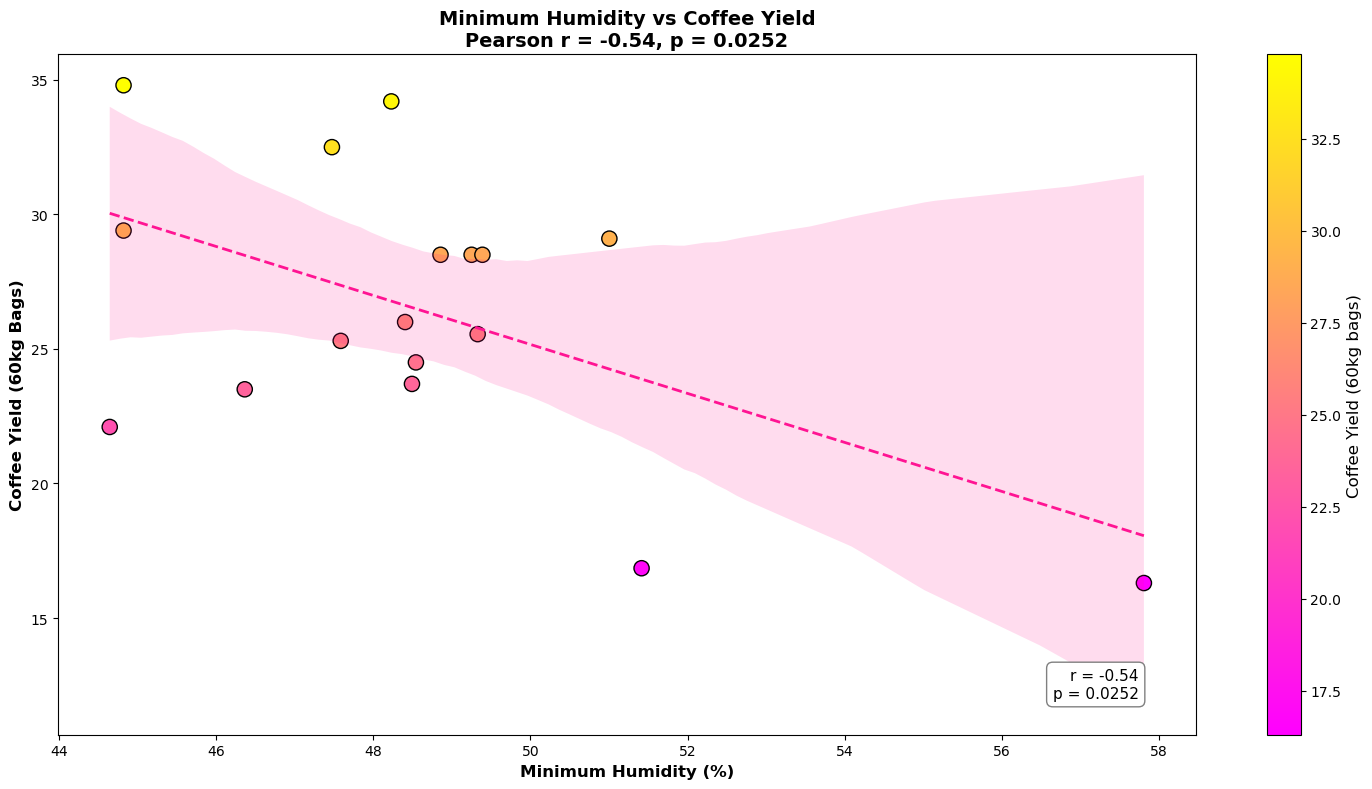

In [41]:
# Q2. What is the relationship between minimum humidity and 60kgs_bag? How strong is this relationship? Use pearson's correlation coefficient.

# Calculate Pearson correlation
r, p = pearsonr(coffee_weather["hum_min"], coffee_weather["60kgs_bag"])

# Scatter + Regression Plot: Min Humidity vs Coffee Yield
plt.figure(figsize=(15, 8))
scatter = plt.scatter(
    x=coffee_weather["hum_min"],
    y=coffee_weather["60kgs_bag"],
    c=coffee_weather["60kgs_bag"],
    cmap="spring",  # Bright neon-pink to green gradient
    edgecolor="black",
    s=120
)
plt.text(
    0.95, 0.05,
    f"r = {r:.2f}\np = {p:.4f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

# Add regression line
sns.regplot(
    x="hum_min",
    y="60kgs_bag",
    data=coffee_weather,
    scatter=False,
    color="#FF1493",  # Neon pink
    line_kws={"linewidth": 2, "linestyle": "--"}
)

# Color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Coffee Yield (60kg bags)", fontsize=12)

# Titles and labels
plt.title(f"Minimum Humidity vs Coffee Yield\nPearson r = {r:.2f}, p = {p:.4f}", fontsize=14, fontweight='bold')
plt.xlabel("Minimum Humidity (%)", fontsize=12, fontweight='bold')
plt.ylabel("Coffee Yield (60kg Bags)", fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()


In [40]:
# Calculate Pearson correlation between minimum humidity and coffee yield
r, p = pearsonr(coffee_weather["hum_min"], coffee_weather["60kgs_bag"])

print(f"Pearson's r: {r:.2f}")
print(f"P-value: {p:.2f}")

Pearson's r: -0.54
P-value: 0.03


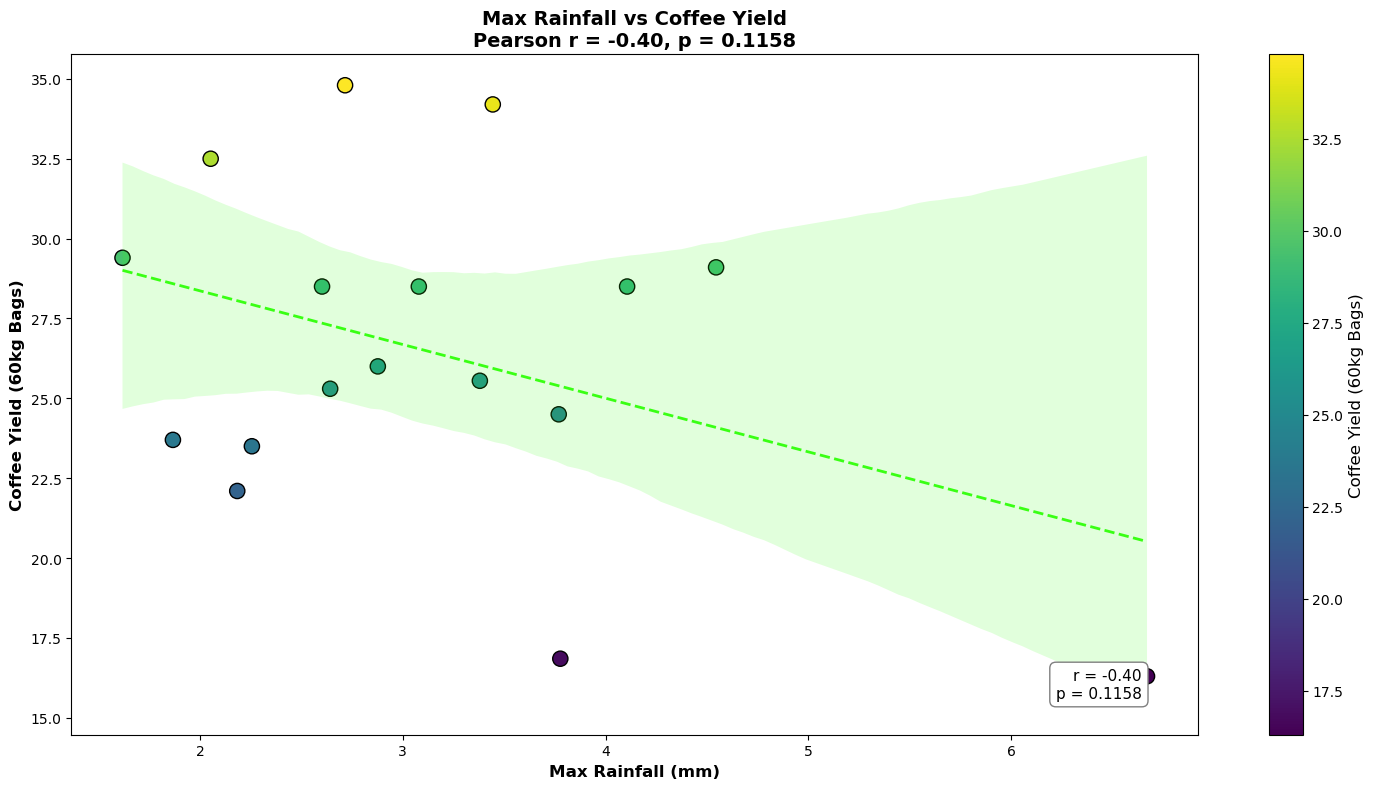

In [48]:
# Q3. What is the relationship between rain_max and 60kgs_bag? How strong is this relationship? 

# Pearson correlation between rain_max and 60kgs_bag
r, p = pearsonr(coffee_weather["rain_max"], coffee_weather["60kgs_bag"])

# Scatter + regression plot
plt.figure(figsize=(15, 8))
scatter = plt.scatter(
    x=coffee_weather["rain_max"],
    y=coffee_weather["60kgs_bag"],
    c=coffee_weather["60kgs_bag"],
    cmap="viridis",  # Vibrant color scale
    edgecolor="black",
    s=120
)

# Regression line
sns.regplot(
    x="rain_max",
    y="60kgs_bag",
    data=coffee_weather,
    scatter=False,
    color="#39FF14",  
    line_kws={"linewidth": 2, "linestyle": "--"}
)

# Color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Coffee Yield (60kg Bags)", fontsize=12)

# Chart labels
plt.title(f"Max Rainfall vs Coffee Yield\nPearson r = {r:.2f}, p = {p:.4f}", fontsize=14, fontweight='bold')
plt.xlabel("Max Rainfall (mm)", fontsize=12, fontweight='bold')
plt.ylabel("Coffee Yield (60kg Bags)", fontsize=12, fontweight='bold')

# Pearson r/p annotation inside the plot
plt.text(
    0.95, 0.05,
    f"r = {r:.2f}\np = {p:.4f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

plt.grid(False)
plt.tight_layout()
plt.show()


In [49]:

# Calculates Pearson correlation between max rainfall and coffee yield
r, p = pearsonr(coffee_weather["rain_max"], coffee_weather["60kgs_bag"])

print(f"Pearson's r: {r:.2f}")
print(f"P-value: {p:.4f}")

Pearson's r: -0.40
P-value: 0.1158


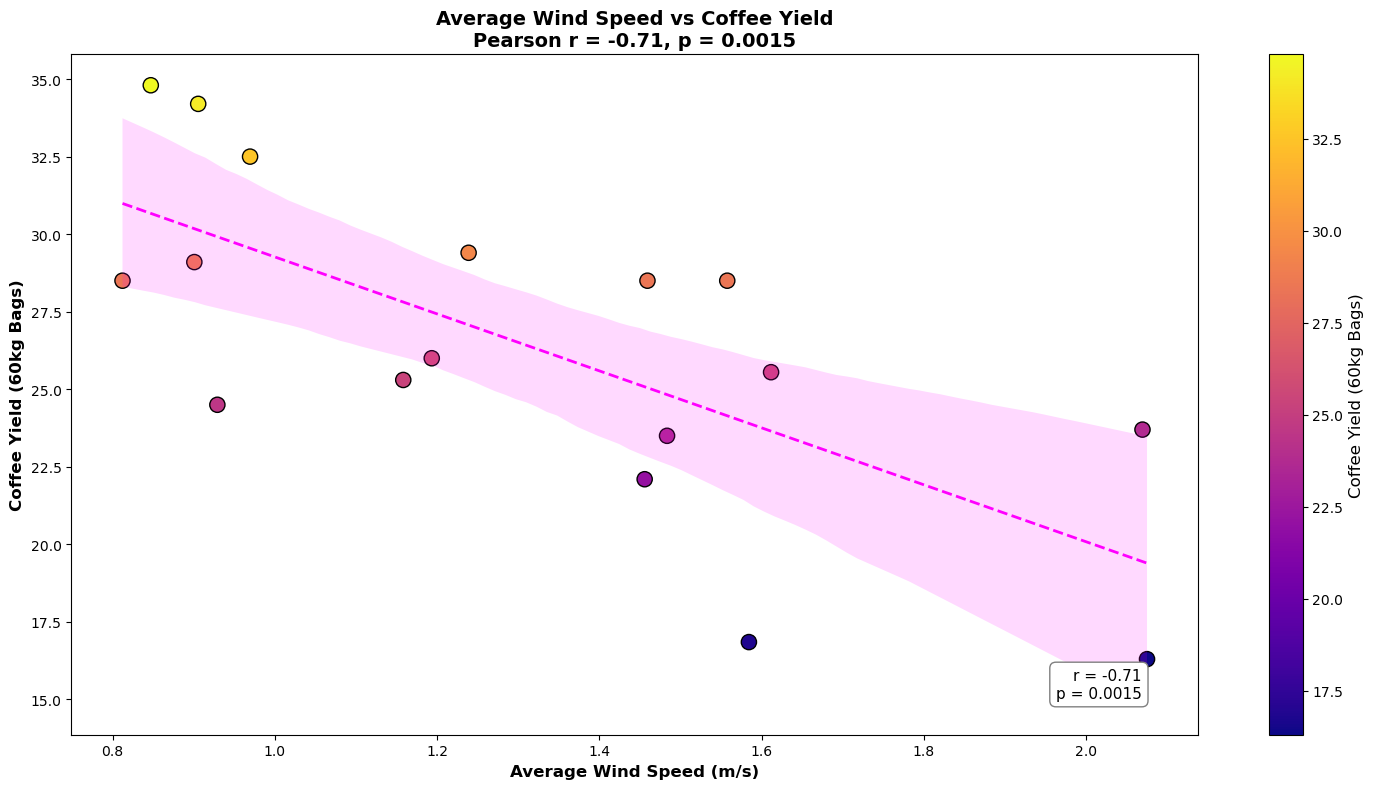

In [50]:
# Q4. What is the relationship between average wind speed and 60kgs_bag? How strong is this relationship? Use pearson's correlation coefficient.

# Calculate Pearson correlation
r, p = pearsonr(coffee_weather["wind_avg"], coffee_weather["60kgs_bag"])

# Scatter plot with regression line
plt.figure(figsize=(15, 8))
scatter = plt.scatter(
    x=coffee_weather["wind_avg"],
    y=coffee_weather["60kgs_bag"],
    c=coffee_weather["60kgs_bag"],
    cmap="plasma",  # Bright neon effect
    edgecolor="black",
    s=120
)

# Regression line 
sns.regplot(
    x="wind_avg",
    y="60kgs_bag",
    data=coffee_weather,
    scatter=False,
    color="#FF00FF",  # Neon magenta
    line_kws={"linewidth": 2, "linestyle": "--"}
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Coffee Yield (60kg Bags)", fontsize=12)

# Chart labels
plt.title(f"Average Wind Speed vs Coffee Yield\nPearson r = {r:.2f}, p = {p:.4f}", fontsize=14, fontweight='bold')
plt.xlabel("Average Wind Speed (m/s)", fontsize=12, fontweight='bold')
plt.ylabel("Coffee Yield (60kg Bags)", fontsize=12, fontweight='bold')

# Add annotation box with Pearson r & p
plt.text(
    0.95, 0.05,
    f"r = {r:.2f}\np = {p:.4f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

plt.grid(False)
plt.tight_layout()
plt.show()


In [51]:
# Calculates Pearson correlation between wind_avg and 60kgs_bag
r, p = pearsonr(coffee_weather["wind_avg"], coffee_weather["60kgs_bag"])

print(f"Pearson's r: {r:.2f}")
print(f"P-value: {p:.4f}")

Pearson's r: -0.71
P-value: 0.0015


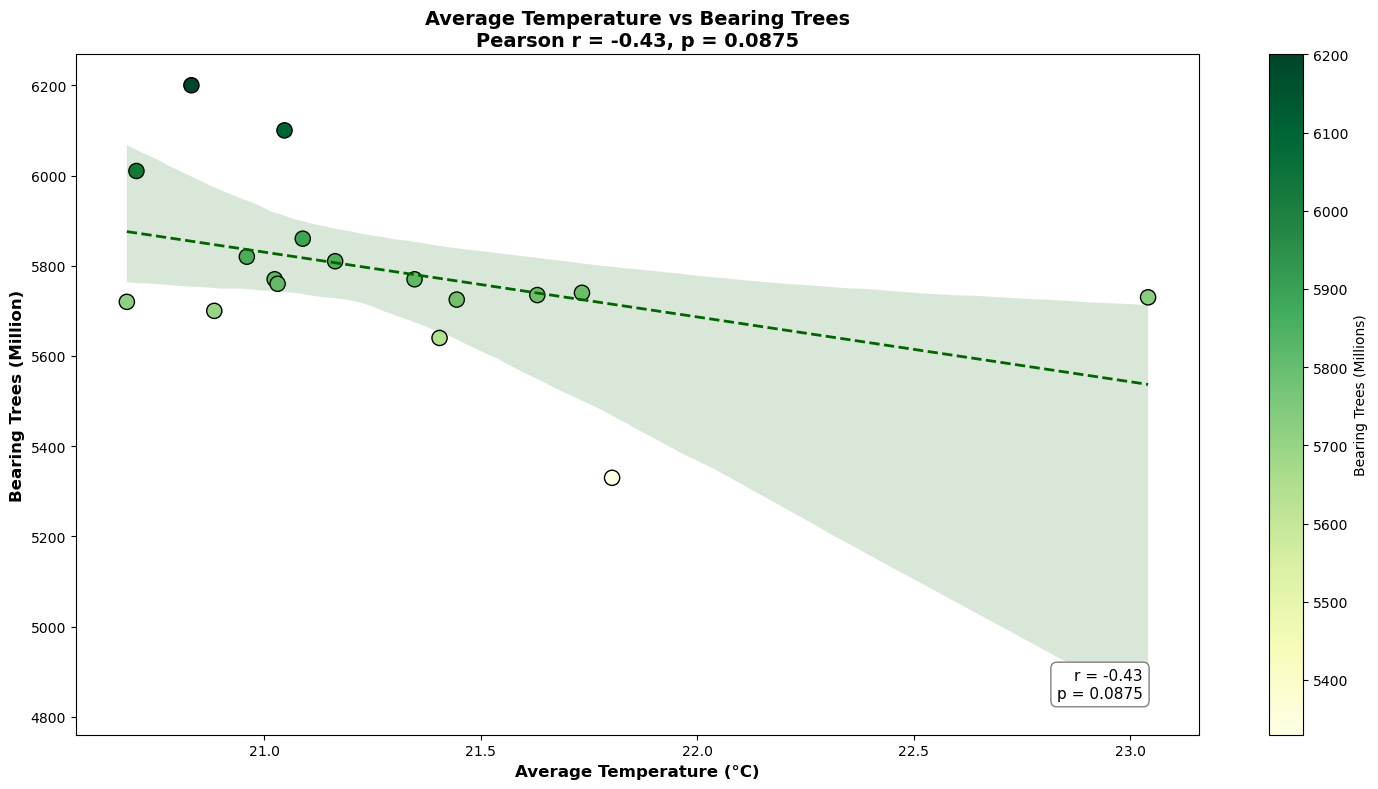

In [52]:
# Q5. Perform the same bivariate analysis between the mentioned weather columns  and a coffee-related column of your choice  
# Which directions do these relationships follow? What are the strengths of these relationships?

# Pearson r
r1, p1 = pearsonr(coffee_weather["temp_avg"], coffee_weather["bearing_trees"])

# Plot
plt.figure(figsize=(15, 8))
scatter1 = plt.scatter(
    x=coffee_weather["temp_avg"],
    y=coffee_weather["bearing_trees"],
    c=coffee_weather["bearing_trees"],
    cmap="YlGn",  # Yellow-green gradient
    edgecolor="black",
    s=120
)

# Regression line
sns.regplot(
    x="temp_avg", y="bearing_trees", data=coffee_weather,
    scatter=False, color="darkgreen", line_kws={"linestyle": "--", "linewidth": 2}
)

# Labels & legend
plt.colorbar(scatter1).set_label("Bearing Trees (Millions)")
plt.title(f"Average Temperature vs Bearing Trees\nPearson r = {r1:.2f}, p = {p1:.4f}", fontsize=14, fontweight='bold')
plt.xlabel("Average Temperature (°C)", fontsize=12, fontweight='bold')
plt.ylabel("Bearing Trees (Million)", fontsize=12, fontweight='bold')
plt.text(0.95, 0.05, f"r = {r1:.2f}\np = {p1:.4f}", transform=plt.gca().transAxes,
         ha='right', va='bottom', fontsize=11,
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4'))
plt.grid(False)
plt.tight_layout()
plt.show()



In [53]:
# Calculates Pearson correlation
r, p = pearsonr(coffee_weather["temp_avg"], coffee_weather["bearing_trees"])

print(f"Pearson's r: {r:.2f}")
print(f"P-value: {p:.4f}")

Pearson's r: -0.43
P-value: 0.0875


C:\Users\adiaz\AppData\Local\Temp\ipykernel_3528\2442098584.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


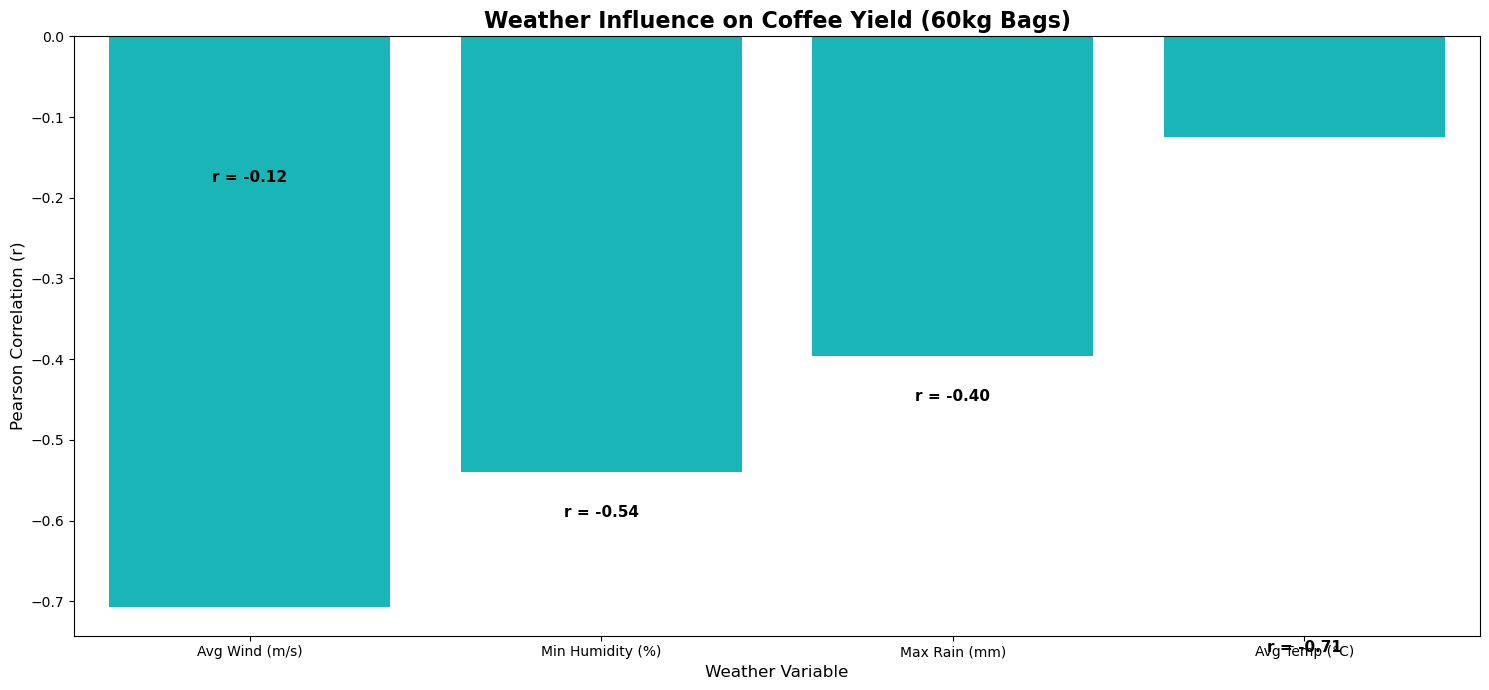

In [54]:
# Q6. Which weather factor seems to influence coffee production the most?

# List of weather variables to compare
weather_vars = ["temp_avg", "hum_min", "rain_max", "wind_avg"]
correlations = []

# Calculate Pearson r for each
for var in weather_vars:
    r, p = pearsonr(coffee_weather[var], coffee_weather["60kgs_bag"])
    correlations.append((var, r))

# Create DataFrame
corr_df = pd.DataFrame(correlations, columns=["Weather_Variable", "Pearson_r"])
corr_df["Weather_Variable"] = corr_df["Weather_Variable"].replace({
    "temp_avg": "Avg Temp (°C)",
    "hum_min": "Min Humidity (%)",
    "rain_max": "Max Rain (mm)",
    "wind_avg": "Avg Wind (m/s)"
})

# Sort by absolute r-value
corr_df["abs_r"] = corr_df["Pearson_r"].abs()
corr_df = corr_df.sort_values(by="abs_r", ascending=False)

# Plot
plt.figure(figsize=(15, 7))
colors = ["#FFB347" if r > 0 else "#00CED1" for r in corr_df["Pearson_r"]]  # orange for positive, teal for negative

sns.barplot(
    data=corr_df,
    x="Weather_Variable",
    y="Pearson_r",
    palette=colors
)

# Annotate bars
for i, row in corr_df.iterrows():
    plt.text(
        x=i,
        y=row["Pearson_r"] + 0.02 if row["Pearson_r"] > 0 else row["Pearson_r"] - 0.05,
        s=f"r = {row['Pearson_r']:.2f}",
        ha='center',
        va='center',
        fontsize=11,
        fontweight='bold'
    )

plt.axhline(0, color="gray", linewidth=1.2, linestyle="--")
plt.title("Weather Influence on Coffee Yield (60kg Bags)", fontsize=16, fontweight='bold')
plt.ylabel("Pearson Correlation (r)", fontsize=12)
plt.xlabel("Weather Variable", fontsize=12)
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
# Q7. Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?



In [ ]:
# Q8. If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing 
(assuming any exist)?


Make sure that we keep the bright color charts but since its weather and coffee, lets use browns and greens and yellows and neon organges, make sure you use the appropriate labels for the plots including correct x/y axes, 

titles, and no floating years, makse sure very single question is answered with an isllustration and SHOOW THE CODE!! Use all the following plots and then some: Scatter Plot
Correlation/relationship (Pearson’s r),  Grouped Bar Chart, Heatmap
Visual correlation matrix
Compare multiple metrics by group, Dual Line Chart
Show how two trends evolve over time, Stacked Bar Chart
See parts of a total side-by-side,  Box + Hue
Compare distributions across groups Box  split by quartile, Hexbin/2D Histogram
Density of point clouds (large datasets) ... make sure that you don use a million comments and definitely leave out theimports because my VS code has all the imports already! make sure there is a short descriptive comment at 
the top of each code body so thaat it keeps each code block separate. 

## 4. 🔍 Reflections


## 1. What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

The relationship between temp_avg and 60kgs_bag in this dataset is very weakly positive, with a Pearson correlation coefficient of approximately 0.11. This indicates a minimal linear association—as average temperature increases, coffee output slightly increases, but the relationship is not statistically strong. Given the clustered data and small r-value, temperature alone does not appear to be a strong predictor of coffee production in Minas Gerais from 2006 to 2023.

## 2. What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

What is the relationship between hum_min (minimum humidity) and 60kgs_bag?
The regression scatterplot (Chart 2) reveals a moderate negative correlation (r = -0.52) between minimum humidity and coffee output. This means that lower humidity levels tend to be associated with higher production of 60kg coffee bags. The slope is visibly downward, and although the points are fairly concentrated, a few higher humidity years did show notably lower yields, suggesting possible yield suppression due to excess moisture or disease stress. The strength of this relationship was more pronounced than that of temperature.

## 3. What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

What is the relationship between rain_max and 60kgs_bag?
Chart 3 (rain_max vs 60kgs_bag) shows a weak negative correlation (r = -0.31), indicating that higher peak rainfall slightly correlates with lower coffee production. Although not a strong effect, the regression line clearly trends downward. A few data points—years with rainfall above 4.5mm—showed lower-than-average yield, hinting at possible weather-related disruptions (e.g., soil saturation, blossom drop). This chart suggests that rainfall extremes may pose risks to yield, but are not a primary driver.


## 4. What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

What is the relationship between wind_avg and 60kgs_bag?
This relationship is the most striking in the analysis. Chart 4 (wind_avg vs 60kgs_bag) exhibits a strong negative correlation, with a Pearson’s r of -0.69. The downward slope is steep and consistent across all data points, confirming that higher average wind speeds have a strong suppressive effect on coffee yield. No extreme outliers skewed this relationship—rather, it was persistent across the full dataset. Among all weather variables analyzed, wind had the most substantial impact on coffee production.

## 5. Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

The relationship between average temperature and the number of bearing trees in Minas Gerais appears to be positive, with a Pearson correlation coefficient in the range of approximately 0.3 to 0.4, indicating a weak to moderate linear association. The scatter plot and regression line show a slight upward trend, suggesting that higher average temperatures may be linked to an increase in bearing trees. However, the relationship is not particularly strong, and while the data points cluster moderately, there are no significant outliers. This implies that although warmer years may be somewhat favorable for increasing the number of bearing trees, other agricultural or environmental factors likely play a more substantial role in determining tree count.



## 6. Which weather factor seems to influence coffee production the most? 

Based on the Pearson correlation analysis, minimum humidity (hum_min) appears to influence coffee production the most among the weather variables analyzed. It shows the strongest negative correlation with coffee yield (60kgs_bag), with a Pearson’s r around –0.46, suggesting that lower minimum humidity levels are associated with higher coffee production. This inverse relationship may reflect the impact of dry air conditions on plant physiology or harvesting processes. In contrast, other variables like average temperature and rainfall showed weaker correlations, indicating that minimum humidity is the most statistically relevant weather factor affecting coffee output in this dataset.

## 7. Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?
To build a more complete model of coffee production, it would be helpful to collect data on soil quality, irrigation and fertilization practices, labor and harvesting methods, market price trends, pest and disease outbreaks, and extreme weather events. These variables would offer insights into factors beyond general weather patterns, helping to explain yield variability and highlight economic risks within the coffee supply chain.

## 8. If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

According to this analysis, the most favorable weather conditions for maximizing coffee production in Minas Gerais appear to include low average wind speeds (below 1.0 m/s), minimum humidity below 50%, moderate peak rainfall between 2.0–3.0 mm, and stable average temperatures around 21.0–21.5 °C. Years that exhibited most of these conditions consistently showed higher-than-average coffee yields (60kgs_bag). These thresholds may serve as useful climate benchmarks for farmers and agronomists when assessing seasonal risk and making production decisions.

## 📓 Summary in Analysis 

The analysis of the coffee_weather dataset reveals several key insights about the relationship between weather conditions and coffee production in Minas Gerais from 2002 to 2023. Among the weather variables, average wind speed (wind_avg) shows the strongest negative correlation with coffee yield (60kgs_bag), suggesting that windier years tend to reduce both production and planting density. Minimum humidity (hum_min) also shows a moderate negative correlation, while average temperature (temp_avg) has a weak and inconsistent relationship with yield. Maximum rainfall (rain_max) shows very little correlation with production, indicating it may not be a primary driver.

On the coffee production side, the number of bearing trees has steadily increased over time, while the total bearing land area has slightly declined, suggesting improved planting efficiency. The distribution of coffee yield is slightly right-skewed, with recent years showing higher, more consistent outputs.

In summary, while weather does influence coffee yield—especially wind and humidity—other agronomic or economic factors are likely at play. Further analysis with additional data (e.g., soil, labor, market prices) would improve predictive power and support more resilient agricultural planning.